In [1]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np

import SEACells

# Load SEAcells summary from RNA + ATAC integration

In [2]:
metacell_summary = pd.read_csv("results/SEACells_summary.csv")
metacells = pd.read_csv("results/SEACells.csv")

In [3]:
metacells

,index,source,annot1,sample_id,SEACell_type
0,A09#GAGAACGTCCCAATGA-1,ATAC,S1,A09,S1_SEACell-134
1,A07#AGTGTACCACACATTG-1,ATAC,S1,A07,S1_SEACell-61
2,GATCATGCAGTCTACA-R04,RNA,S1,R04,S1_SEACell-94
3,A11#GAATCTGAGAGCAGCT-1,ATAC,S1,A11,S1_SEACell-66
4,A07#ACAATCGGTACCCACG-1,ATAC,S1,A07,S1_SEACell-251
...,...,...,...,...,...
83230,GGTGAAGCACAAGCCC-R04,RNA,PC,R04,PC_SEACell-20
83231,CAACCAACAATACGAA-R05,RNA,PC,R05,PC_SEACell-4
83232,A05#ACCATCCTCTTAAGCG-1,ATAC,PC,A05,PC_SEACell-24
83233,NX18#CTCACCACAATAGTGA-1,ATAC,PC,NX18,PC_SEACell-22


In [4]:
metacells.index = metacells['index']
metacells = metacells.drop(columns='index')

In [5]:
metacells

,source,annot1,sample_id,SEACell_type
index,,,,
A09#GAGAACGTCCCAATGA-1,ATAC,S1,A09,S1_SEACell-134
A07#AGTGTACCACACATTG-1,ATAC,S1,A07,S1_SEACell-61
GATCATGCAGTCTACA-R04,RNA,S1,R04,S1_SEACell-94
A11#GAATCTGAGAGCAGCT-1,ATAC,S1,A11,S1_SEACell-66
A07#ACAATCGGTACCCACG-1,ATAC,S1,A07,S1_SEACell-251
...,...,...,...,...
GGTGAAGCACAAGCCC-R04,RNA,PC,R04,PC_SEACell-20
CAACCAACAATACGAA-R05,RNA,PC,R05,PC_SEACell-4
A05#ACCATCCTCTTAAGCG-1,ATAC,PC,A05,PC_SEACell-24


In [6]:
metacell_summary.index = metacell_summary.SEACell_type

In [7]:
metacell_summary = metacell_summary.drop(columns=["SEACell"])

In [8]:
metacell_summary = metacell_summary.rename(columns={"source": "SEACell_primary_source", "source_purity": "SEACell_primary_source_purity"})

In [9]:
metacell_summary

,SEACell_primary_source,SEACell_primary_source_purity,annot1,SEACell_type
SEACell_type,,,,
S1_SEACell-0,ATAC,0.772727,S1,S1_SEACell-0
S1_SEACell-1,ATAC,0.987654,S1,S1_SEACell-1
S1_SEACell-10,ATAC,0.600000,S1,S1_SEACell-10
S1_SEACell-100,ATAC,0.616162,S1,S1_SEACell-100
S1_SEACell-101,ATAC,0.860759,S1,S1_SEACell-101
...,...,...,...,...
PC_SEACell-5,ATAC,0.653061,PC,PC_SEACell-5
PC_SEACell-6,RNA,0.671958,PC,PC_SEACell-6
PC_SEACell-7,ATAC,0.658824,PC,PC_SEACell-7


In [10]:
# Filter cells with balanced ATAC and RNA contribution at threshold
metacell_summary[metacell_summary.SEACell_primary_source_purity  < 0.9]

,SEACell_primary_source,SEACell_primary_source_purity,annot1,SEACell_type
SEACell_type,,,,
S1_SEACell-0,ATAC,0.772727,S1,S1_SEACell-0
S1_SEACell-10,ATAC,0.600000,S1,S1_SEACell-10
S1_SEACell-100,ATAC,0.616162,S1,S1_SEACell-100
S1_SEACell-101,ATAC,0.860759,S1,S1_SEACell-101
S1_SEACell-103,ATAC,0.789474,S1,S1_SEACell-103
...,...,...,...,...
PC_SEACell-5,ATAC,0.653061,PC,PC_SEACell-5
PC_SEACell-6,RNA,0.671958,PC,PC_SEACell-6
PC_SEACell-7,ATAC,0.658824,PC,PC_SEACell-7


# Load raw count data

## ATAC

In [11]:
atac = sc.read('../fibroblast_reanalysis/data/scATAC_PeakMatrix_fibro.processed.h5ad')

In [12]:
atac

AnnData object with n_obs × n_vars = 56689 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 

In [13]:
atac.obs.annot1.value_counts()

S1     18132
S3     15791
S2      7452
S5      4881
MF1     4135
S3x     3819
PC      1678
S4       801
MF2        0
Name: annot1, dtype: int64

In [14]:
print(atac.X[1:10, 1:10])

  (1, 3)	6.7662582
  (2, 2)	5.086071
  (3, 2)	2.5430355
  (5, 3)	6.7662582
  (5, 7)	3.181742
  (6, 3)	3.3831291
  (8, 2)	5.086071


In [15]:
print(atac.raw.X[1:10, 1:10])

  (1, 3)	2.0
  (2, 2)	2.0
  (3, 2)	1.0
  (5, 7)	2.0
  (5, 3)	2.0
  (6, 3)	1.0
  (8, 2)	2.0


In [16]:
# # Subset data
# select_cells = ['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'MF2', 'PC']
# atac = atac[atac.obs.annot1.isin(select_cells)]

# atac.obs.annot1 = atac.obs.annot1.cat.add_categories('MF2')  # add missing category (such that coloring scheme aligns with scRNA-seq data)

# # Reorder annotation labels
# atac.obs.annot1 = atac.obs.annot1.cat.reorder_categories([
#     'S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'MF2', 'PC'  # data does not contain MF2
# ])

In [17]:
# atac

In [18]:
# Add SEAcells column
atac.obs = atac.obs.join(metacells[['SEACell_type']])

## RNA

In [19]:
rna = sc.read('../data/rna/scRNA_batch1_2.raw.fibroblasts.h5ad')

Only considering the two last: ['.fibroblasts', '.h5ad'].
Only considering the two last: ['.fibroblasts', '.h5ad'].


In [20]:
rna

AnnData object with n_obs × n_vars = 26727 × 17707
    obs: 'doublet_bh_pval_x', 'n_counts_x', 'sample_id_x', 'scrublet_score_x', 'GEX_SID_x', 'ATAC_SID_x', 'GEX_x', 'ATAC_x', 'Sample_x', 'DOB_x', 'Gender_x', 'date_x', 'age_years_x', 'state_x', 'disease_x', 'site_taken_fine_x', 'site_taken_broad_x', 'sorted_x', 'Nancy_histologic_score_x', 'slide_look_other_x', 'whole_tissue_signature_x', 'scSeq_x', 'bulkSeq_x', 'log1p_n_counts_x', 'n_genes_x', 'log1p_n_genes_x', 'percent_mito_x', 'percent_ribo_x', 'percent_hb_x', 'percent_top50_x', 'doublet_bh_pval_y', 'n_counts_y', 'sample_id_y', 'scrublet_score_y', 'log1p_n_counts_y', 'n_genes_y', 'log1p_n_genes_y', 'percent_mito_y', 'percent_ribo_y', 'percent_hb_y', 'percent_top50_y', 'GEX_SID_y', 'ATAC_SID_y', 'GEX_y', 'ATAC_y', 'Sample_y', 'DOB_y', 'Gender_y', 'date_y', 'age_years_y', 'state_y', 'disease_y', 'site_taken_fine_y', 'site_taken_broad_y', 'sorted_y', 'Nancy_histologic_score_y', 'slide_look_other_y', 'whole_tissue_signature_y', 'scSeq_y

In [21]:
rna.obs.annot1.value_counts()

S3     8295
S1     5644
S3x    3175
S5     3103
S2     3029
MF1    1401
PC     1200
S4      699
MF2     181
Name: annot1, dtype: int64

In [22]:
print(rna.X[1:20, 1:10])

  (12, 6)	1.0
  (13, 7)	1.0
  (15, 7)	1.0
  (15, 5)	1.0
  (16, 3)	1.0
  (18, 6)	1.0


In [23]:
# Add SEAcells column
rna.obs = rna.obs.join(metacells[['SEACell_type']])

In [24]:
rna.obs

,doublet_bh_pval_x,n_counts_x,sample_id_x,scrublet_score_x,GEX_SID_x,ATAC_SID_x,GEX_x,ATAC_x,Sample_x,DOB_x,...,is_doublet,leiden_bk_split1,leiden_bk_split2,leiden_bk_split3,annot1,leiden_bk_split4,annot_gut_lr,annot_gut_lr_prob,broad_annot1,SEACell_type
index,,,,,,,,,,,,,,,,,,,,,
AAACCCATCGTGCTCT-R01,0.737696,1890.0,R01,0.286344,R01,A01,GX46,NX02,110544,24/10/1951,...,False,6,6,6,S2,6,WNT5B+ 1,0.253333,S2,S2_SEACell-8
AAACGAACATGTTACG-R01,0.737696,2811.0,R01,0.192308,R01,A01,GX46,NX02,110544,24/10/1951,...,False,1,1,1,S1,1,WNT2B+ Fos-hi,0.514190,S1,S1_SEACell-65
AAACGAAGTTCCGTTC-R01,0.737696,1707.0,R01,0.167630,R01,A01,GX46,NX02,110544,24/10/1951,...,False,4,4,4,S3x,4,WNT2B+ Fos-hi,0.294068,S3x,S3x_SEACell-36
AAACGCTGTCGTTGGC-R01,0.737696,1959.0,R01,0.029213,R01,A01,GX46,NX02,110544,24/10/1951,...,False,4,4,4,S3x,4,RSPO3+,0.274607,S3x,S3x_SEACell-75
AAAGAACCACAAGGTG-R01,0.737696,2126.0,R01,0.122970,R01,A01,GX46,NX02,110544,24/10/1951,...,False,1,1,1,S1,1,WNT2B+ Fos-hi,0.303378,S1,S1_SEACell-62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCATTCGATG-R13,0.863149,2774.0,R13,0.067358,R13,A13,GX43,NX82,113395,8/12/1976,...,False,4,4,4,S3x,4,RSPO3+,0.200662,S3x,S3x_SEACell-57
TTTGGTTGTACTAGCT-R13,0.863149,5568.0,R13,0.142857,R13,A13,GX43,NX82,113395,8/12/1976,...,False,"0,0","0,0","0,0",S3,"0,0",RSPO3+,0.231953,S3,S3_SEACell-129
TTTGGTTTCGTGGACC-R13,0.863149,4897.0,R13,0.073171,R13,A13,GX43,NX82,113395,8/12/1976,...,False,"0,0","0,0","0,0",S3,"0,0",RSPO3+,0.272154,S3,S3_SEACell-220


<Axes: xlabel='SEACell_type', ylabel='Count'>

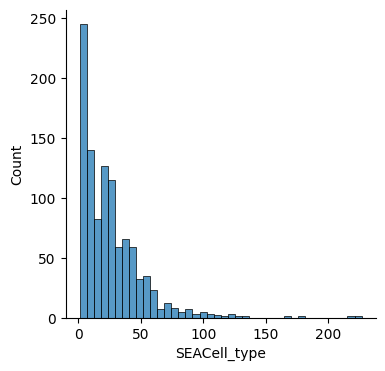

In [25]:
sns.histplot(rna.obs.SEACell_type.value_counts())

<Axes: xlabel='SEACell_type', ylabel='Count'>

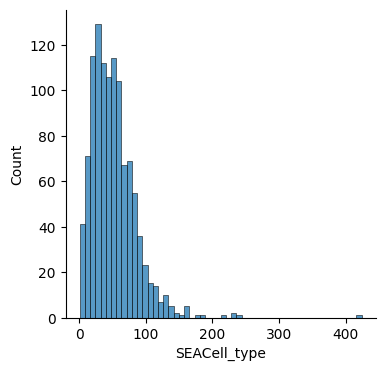

In [26]:
sns.histplot(atac.obs.SEACell_type.value_counts())

In [27]:
#atac.obs

# Aggregate raw counts by SEAcells

In [28]:
seacell_atac = SEACells.core.summarize_by_SEACell(atac, SEACells_label='SEACell_type', summarize_layer='raw')

100%|██████████| 1108/1108 [00:23<00:00, 47.64it/s]


In [29]:
rna.raw = rna  # summarize_by_SEACell expects raw counts in this format

In [30]:
seacell_rna = SEACells.core.summarize_by_SEACell(rna, SEACells_label='SEACell_type', summarize_layer='raw')

100%|██████████| 1046/1046 [00:19<00:00, 52.46it/s]


In [31]:
seacell_atac

AnnData object with n_obs × n_vars = 1108 × 407383
    layers: 'raw'

In [32]:
seacell_rna

AnnData object with n_obs × n_vars = 1046 × 17707
    layers: 'raw'

In [33]:
#print(seacell_atac.X[1:10, 1:10])

In [34]:
#print(rna.X[1:20, 1:10])

## Append metacell summary statistics

In [35]:
#seacell_rna.obs

In [36]:
seacell_rna.obs = seacell_rna.obs.join(metacell_summary)

In [37]:
seacell_atac.obs = seacell_atac.obs.join(metacell_summary)

In [38]:
#seacell_atac.obs

### Filter metacells

In [39]:
# Exclude metacells with >=10% coverage in ATAC or RNA
include_metacells = metacell_summary.SEACell_type[metacell_summary.SEACell_primary_source_purity  < 0.9]

In [40]:
seacell_rna.obs

,SEACell_primary_source,SEACell_primary_source_purity,annot1,SEACell_type
S2_SEACell-8,ATAC,0.579439,S2,S2_SEACell-8
S1_SEACell-65,ATAC,0.531915,S1,S1_SEACell-65
S3x_SEACell-36,ATAC,0.694118,S3x,S3x_SEACell-36
S3x_SEACell-75,ATAC,0.760417,S3x,S3x_SEACell-75
S1_SEACell-62,RNA,0.680000,S1,S1_SEACell-62
...,...,...,...,...
S1_SEACell-16,ATAC,0.982036,S1,S1_SEACell-16
S3_SEACell-105,ATAC,0.954545,S3,S3_SEACell-105
S1_SEACell-174,ATAC,0.936170,S1,S1_SEACell-174
S1_SEACell-207,ATAC,0.980769,S1,S1_SEACell-207


In [41]:
seacell_atac = seacell_atac[seacell_atac.obs.index.isin(include_metacells)]

In [42]:
seacell_atac

View of AnnData object with n_obs × n_vars = 790 × 407383
    obs: 'SEACell_primary_source', 'SEACell_primary_source_purity', 'annot1', 'SEACell_type'
    layers: 'raw'

In [43]:
seacell_rna = seacell_rna[seacell_rna.obs.index.isin(include_metacells)]

In [44]:
seacell_rna

View of AnnData object with n_obs × n_vars = 790 × 17707
    obs: 'SEACell_primary_source', 'SEACell_primary_source_purity', 'annot1', 'SEACell_type'
    layers: 'raw'

### Align metacells by ID

In [45]:
# Reorder such that metacells match

In [46]:
# Reorder ATAC object to match RNA
seacell_atac = seacell_atac[seacell_rna.obs.index]

In [47]:
# Test if index matches
(seacell_atac.obs.index == seacell_rna.obs.index).all()

True

In [48]:
seacell_atac.obs.index

Index(['S2_SEACell-8', 'S1_SEACell-65', 'S3x_SEACell-36', 'S3x_SEACell-75',
       'S1_SEACell-62', 'S2_SEACell-3', 'S3_SEACell-102', 'S1_SEACell-276',
       'S2_SEACell-20', 'S2_SEACell-107',
       ...
       'S3_SEACell-269', 'S3_SEACell-205', 'S3x_SEACell-30', 'S3_SEACell-218',
       'S3_SEACell-318', 'S3_SEACell-315', 'S3_SEACell-254', 'S3_SEACell-248',
       'S3_SEACell-245', 'S2_SEACell-61'],
      dtype='object', length=790)

In [49]:
seacell_rna.obs.index

Index(['S2_SEACell-8', 'S1_SEACell-65', 'S3x_SEACell-36', 'S3x_SEACell-75',
       'S1_SEACell-62', 'S2_SEACell-3', 'S3_SEACell-102', 'S1_SEACell-276',
       'S2_SEACell-20', 'S2_SEACell-107',
       ...
       'S3_SEACell-269', 'S3_SEACell-205', 'S3x_SEACell-30', 'S3_SEACell-218',
       'S3_SEACell-318', 'S3_SEACell-315', 'S3_SEACell-254', 'S3_SEACell-248',
       'S3_SEACell-245', 'S2_SEACell-61'],
      dtype='object', length=790)

In [50]:
#seacell_rna.var

In [51]:
#metacell_summary

### Write raw counts metacell objects

In [52]:
# Test if counts data
print(seacell_atac.X[1:5, 1:5])

  (0, 2)	2.0
  (0, 3)	3.0
  (1, 1)	4.0
  (1, 2)	5.0
  (1, 3)	5.0
  (2, 2)	9.0
  (2, 3)	3.0
  (3, 1)	2.0
  (3, 2)	3.0
  (3, 3)	3.0


In [53]:
print(seacell_rna.X[1:5, 1:5])

  (0, 0)	1.0
  (0, 2)	1.0
  (2, 0)	2.0
  (3, 0)	1.0


In [54]:
seacell_rna.write_h5ad("metacells/scRNA_batch1_2.raw.fibroblasts.metacells.h5ad")
seacell_atac.write_h5ad("metacells/scATAC_PeakMatrix_fibro.processed.metacells.h5ad")


/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
